In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
data= load_breast_cancer()

In [5]:
X,y = data.data, data.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_acc = []
test_acc = []

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
for C in C_values:
    model = LogisticRegression(
        C=C, solver='liblinear', max_iter=1000, random_state=42
    )
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

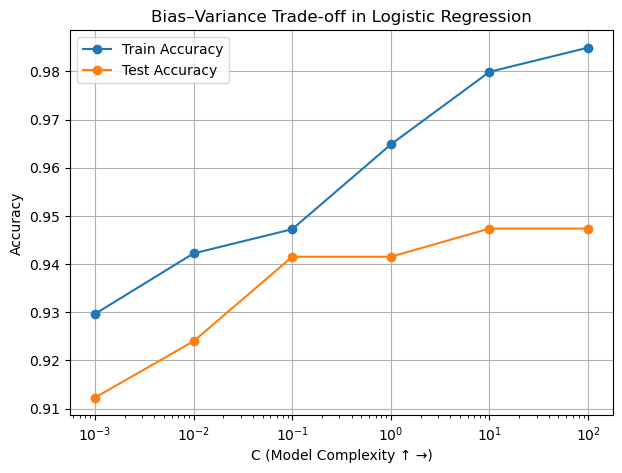

In [11]:
plt.figure(figsize=(7,5))
plt.plot(C_values, train_acc, marker='o', label='Train Accuracy')
plt.plot(C_values, test_acc, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel("C (Model Complexity ↑ →)")
plt.ylabel("Accuracy")
plt.title("Bias–Variance Trade-off in Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()